In [29]:
#all imports
import numpy as np 
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy import signal

In [30]:
# system variables
Ap, Bp, Cp = np.matrix([[0.8,0.8],[0,0.8]]), np.matrix([1, 1]), np.matrix([1, 1])
Am, Bm, Cm = np.matrix([[0.2,0],[0,0.2]]), np.matrix([0.2, 0.2]), np.matrix([1, 1])

In [31]:
# learning rate
gamma = 100
Mtheta = 0.014

# simulation configs
n_points = 100000
t_f = 20

In [32]:
# sempre theta1, theta2, thetay, thetar
theta = np.zeros((n_points, 4))
theta[0] = (0.001, 0.001, 0.001, 0.001)
# sempre omega1, omega2, omegay, omegar 
omega = np.zeros((n_points, 4))

x_m = np.zeros((n_points, 2))
y_m = np.zeros((n_points, 1))
x_p = np.zeros((n_points, 2))
y_p = np.zeros((n_points, 1))

#filtered signals
f_r = np.zeros((n_points, 1))
f_yp = np.zeros((n_points, 1))

# error
error = np.zeros((n_points, 1))
error_aux = np.zeros((n_points, 1))

In [33]:
# signal
T, step = np.linspace(0, t_f, n_points, retstep=True)
print("step: ", step)
r = np.sin(0.2*np.pi*T)    #sinusoidal signal
# r = signal.square(0.2 * np.pi * T) #square signal
# r = signal.sawtooth(0.2 * np.pi * T) #sawtooth signal

# control signal
u = np.zeros((n_points, 1))
u_filter = np.zeros((n_points, 1))
norm = np.zeros((n_points, 1))
sigma = np.zeros((n_points, 1))

step:  0.0002000020000200002


In [34]:
F = 1
q = 1
Fd = 1-F*step
qd=q*step

In [35]:
# main loop
K = 0.3
for k, _ in enumerate(T):
  if(k < n_points - 1):
    # planta
    x_p[k + 1] = Ap.dot(x_p[k]) + Bp.dot(float(u_filter[k]))
    y_p[k + 1] = Cp.dot(x_p[k])

    # ref
    x_m[k + 1] = Am.dot(x_m[k]) + Bm.dot(r[k])
    y_m[k + 1] = Cm.dot(x_m[k])

    # error 
    error[k] = y_p[k + 1] - y_m[k + 1]
    error_aux[k] = K*0.2*(u_filter[k] - u[k])
    # projecao

    norm_theta = LA.norm(theta[k])
    norm[k + 1] = norm_theta
    # print(norm_theta)
    sigmaeq = -gamma*(error[k] - error_aux[k])*(theta[k]).dot(omega[k])/(norm_theta**2)
    if norm_theta >= Mtheta and sigmaeq >= 0:
        sigma[k] = sigmaeq
    else:
        sigmaeq = 0

    theta[k + 1] = theta[k] + step*(-sigma[k]*theta[k] - gamma*error[k]*omega[k])
    
    # theta[k + 1] = theta[k] - step*gamma*error[k]*omega[k]

    # # omega é definido w1, w2, y, r
    omega[k + 1][0] = omega[k][0]*Fd + qd*u[k]
    omega[k + 1][1] = omega[k][1]*Fd + qd*y_m[k]
    omega[k + 1][2] = float(y_m[k])
    omega[k + 1][3] = r[k]

    u[k + 1] = (theta[k].transpose()).dot(omega[k])
    u_filter[k+1] = u[k + 1]*0.5

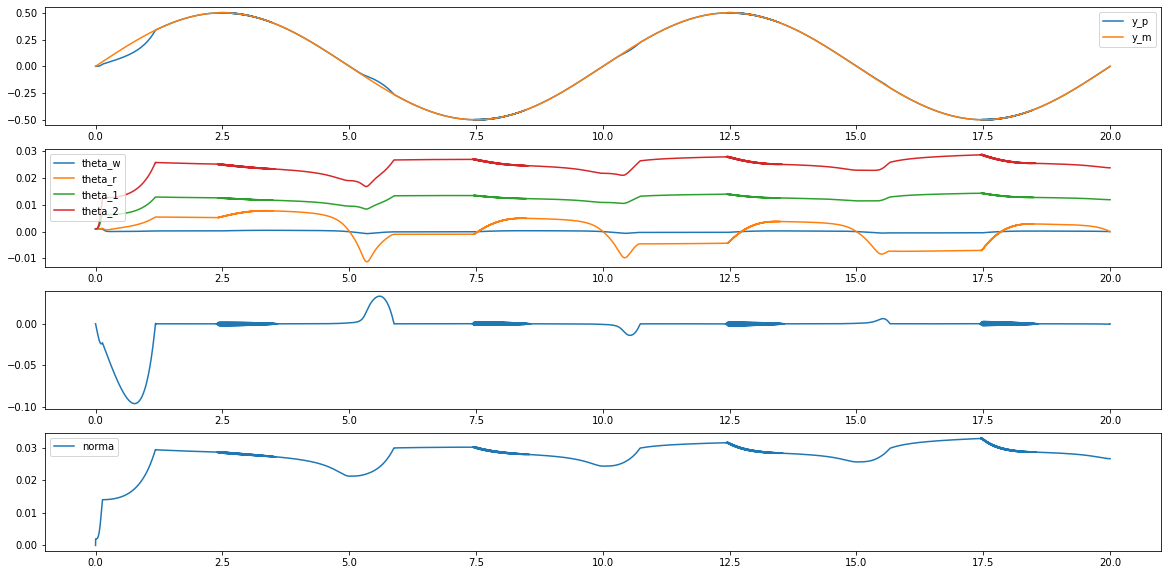

In [36]:
#%matplotlib qt 

#plots
plt.rcParams['figure.figsize'] = [20, 10]
plt.subplot(4,1,1)
plt.plot(T, y_p, label="y_p")
plt.plot(T, y_m, label="y_m")
plt.legend()

plt.subplot(4,1,2)
# print(theta)
# plt.plot(error, T, label="error")
plt.plot(T, theta[:, 0], label='theta_w')
plt.plot(T, theta[:, 1], label='theta_r')
plt.plot(T, theta[:, 2], label='theta_1')
plt.plot(T, theta[:, 3], label='theta_2')
plt.legend()

# #plt.plot(z_a, error, label='error')
plt.subplot(4,1,3)
# print(theta)
# plt.plot(r, label='control_sig')
plt.plot(T, error, label="error")
# plt.plot(T, u, label='control_sig')
plt.subplot(4,1,4)
# print(theta)
# plt.plot(r, label='control_sig')
plt.plot(T, norm, label="norma")
# plt.plot(T, sigma, label='sig')
plt.legend()
plt.show()